In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
gre = Style.BRIGHT + Fore.GREEN
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [2]:
df= pd.read_csv('mental_health_finaldata_1.csv')
df

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [3]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [4]:
df.tail()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe
823,30-Above,Female,Others,15-30 days,No,No,No,No,Yes,Low,Yes,No,Maybe


In [5]:
df.shape

(824, 13)

In [6]:
df.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


1) The most frequently occurring age group is "30-Above"
2) The most commonly reported gender is "Female"
3) The most frequently reported occupation is "Housewife"
4) The most common duration of staying indoors is "31-60 days"
5) The most frequently reported situation is participants indicating that their stress is increasing day by day
6) The most commonly reported situation is participants experiencing frustrations during the quarantine period
7) The most frequently reported situation is participants changing their habits during the quarantine period
8) The most common situation is participants reporting no history of mental health issues in their families
9) The most frequently reported situation is participants not experiencing weight changes during the quarantine period
10) The most frequently reported situation is participants having medium-level mood swings
11) The most commonly reported situation is participants struggling to cope with daily problems or stress
12) The most frequently reported situation is participants not losing interest in their work
13) The most commonly reported situation is participants not feeling mentally weak during social interactions

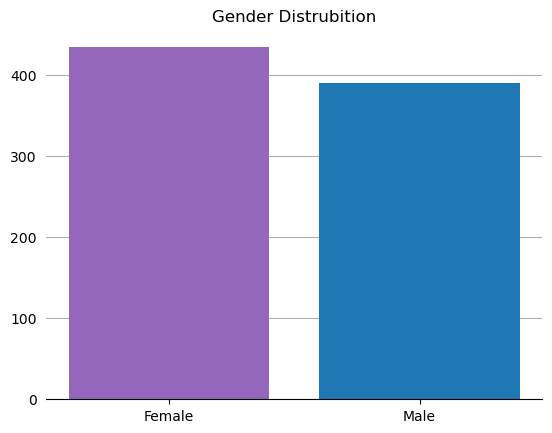

In [7]:
# What is the Gender Distribution
gender_counts = df["Gender"].value_counts()
fig,ax = plt.subplots()
bars = ax.bar(gender_counts.index,gender_counts.values,color=["tab:purple","tab:blue"])
ax.set_title("Gender Distrubition")

plt.xticks(rotation=0) 
plt.grid(axis="y")
ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)

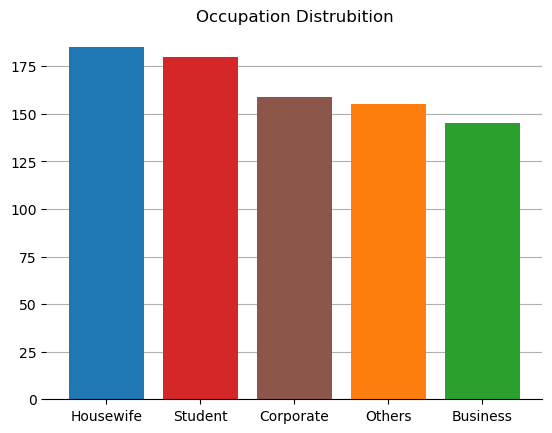

In [8]:
# What is the Distribution of Occupations among participants
occupation_counts = df["Occupation"].value_counts()
colors = ["tab:blue","tab:red","tab:brown","tab:orange","tab:green"]
fig, ax = plt.subplots()
bars = ax.bar(occupation_counts.index,occupation_counts.values,color = colors)
ax.set_title("Occupation Distrubition")
plt.grid(axis="y")
ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)

In [9]:
# What percentage of participants have not left their homes during quarantine?
filtered_counts = [total for index, total in df["Days_Indoors"].value_counts().items() if index != "Go out Every day"]
total_participants = 824
percentage_not_going_out = (sum(filtered_counts) / total_participants) * 100
print(f"{blk}Percentage of participants not leaving home during quarantine:{blk} {blu}{round(percentage_not_going_out,1)}%{res}")

Percentage of participants not leaving home during quarantine: 79.6%


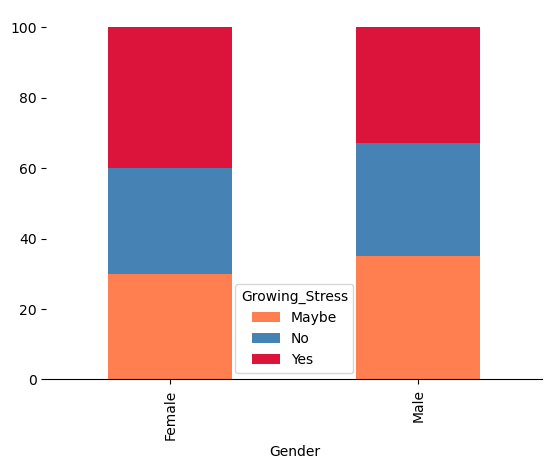

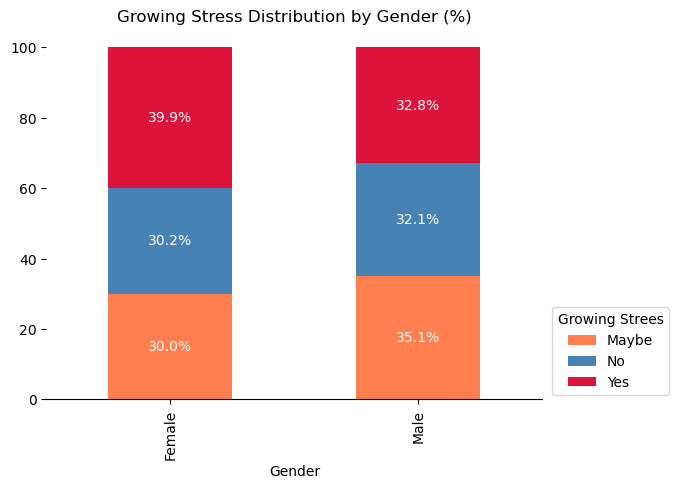

In [11]:
## Is there a significant relationship between gender and the increase in stress?

# Create the pivot table
pivot_table = df.pivot_table(index="Gender", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by gender
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Create the pivot table
pivot_table = df.pivot_table(index="Gender", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by gender
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
plt.title("Growing Stress Distribution by Gender (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=10)

plt.show()

Hypothesis
H0
: There is no relationship between Gender and Stress

HA
: There is a significant relationship between Gender and Stress

Statistical Test

Chi-squared test

In [13]:
#CONCLUSION

crosstab = pd.crosstab(df["Gender"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 4.715651773036949
P-value: 0.09462572678960109
Fail to reject the null hypothesis - No statistically significant relationship - 


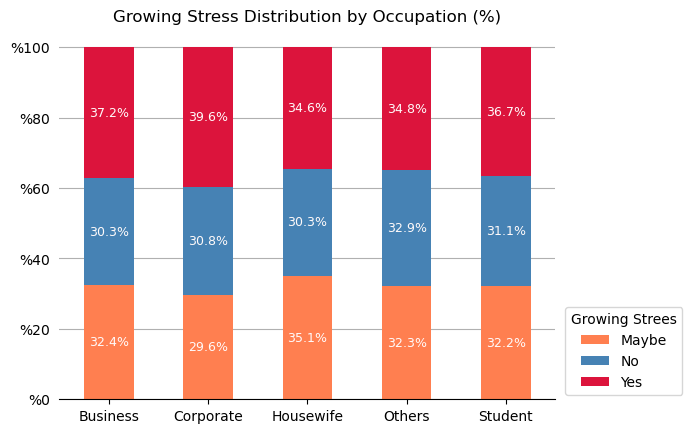

In [14]:
## Is there a significant relationship between occupation and stress?

# Create the pivot table
pivot_table = df.pivot_table(index="Occupation", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by Occupation
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_axisbelow(True)
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Occupation (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis
H0
: There is no relationship between Occupation and Stress

HA
: There is a significant relationship between Occupation and Stress

Statistical Test

Chi-squared test

In [15]:
# CONCLUSION

crosstab = pd.crosstab(df["Occupation"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 1.807737395115538
P-value: 0.9863493092279183
Fail to reject the null hypothesis - No statistically significant relationship - 


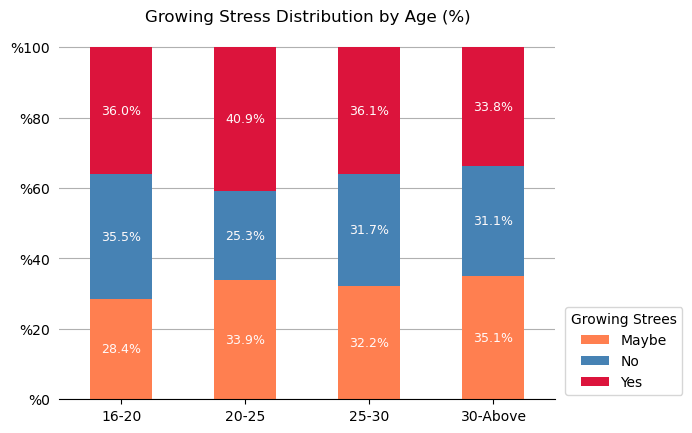

In [16]:
## Is there a significant relationship betwwen age and depression?

# Create the pivot table
pivot_table = df.pivot_table(index="Age", columns="Growing_Stress", aggfunc="size")
# Calculate percentiles by Age
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Age (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Growing Strees")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Age and Stress

HA
: There is a significant relationship between Age and Stress

Statistical Test

Chi-squared test

In [17]:
# CONCLUSION 
crosstab = pd.crosstab(df["Age"], df["Growing_Stress"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 6.502951829944582
P-value: 0.36926452179802627
Fail to reject the null hypothesis - No statistically significant relationship - 


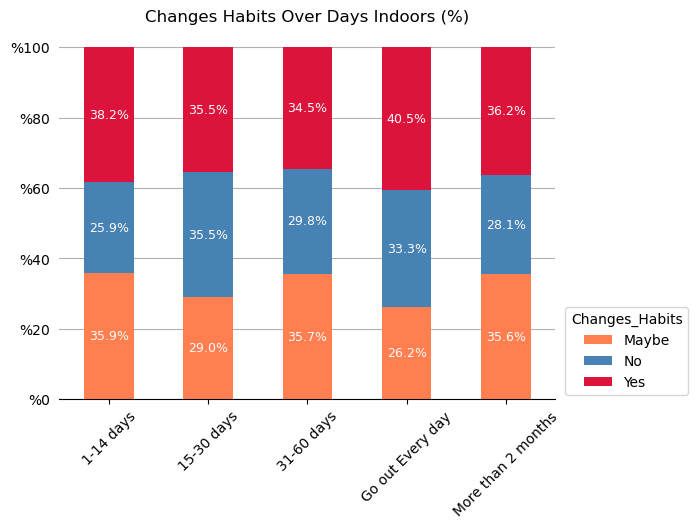

In [18]:
## Do individuals who have spent more days indoor tends to exhibit major changes in habits?

# Create the pivot table
pivot_table = df.pivot_table(index="Days_Indoors", columns="Changes_Habits", aggfunc="size")
# Calculate percentiles by Days_Indoors
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Place the axis below (allows grid lines to appear in front)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=45) 
plt.grid(axis="y")
plt.title("Changes Habits Over Days Indoors (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Changes_Habits")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Indoor Stay and Changes Habits

HA
: There is a significant relationship between Indoor Stay and Changes Habits

Statistical Test

Chi-squared test

In [19]:
# CONCLUSION

crosstab = pd.crosstab(df["Days_Indoors"], df["Changes_Habits"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 8.482094085326352
P-value: 0.38784763080251705
Fail to reject the null hypothesis - No statistically significant relationship - 


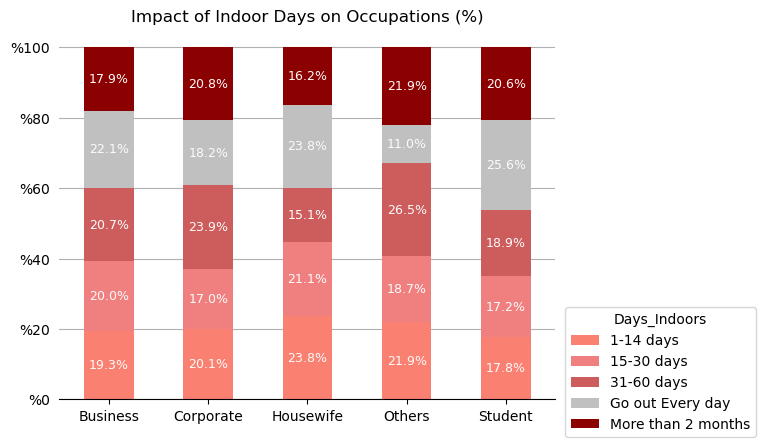

In [20]:
## Is there a significant relationship between Occupation and number of days indoor?

colors = {"1-14 days":"salmon","15-30 days":"lightcoral","31-60 days":"indianred",
          "Go out Every day":"silver","More than 2 months":"darkred"}
# Create the pivot table
pivot_table = df.pivot_table(index="Occupation", columns="Days_Indoors", aggfunc="size")
# Calculate percentiles by Days_Indoors
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Place the axis below (allows grid lines to appear in front)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Impact of Indoor Days on Occupations (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Days_Indoors")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Occupation and Indoor Stay

HA
: There is a significant relationship between Occupation and Indoor Stay

Statistical Test

Chi-squared test

In [21]:
## CONCLUSION

crosstab = pd.crosstab(df["Occupation"], df["Days_Indoors"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 21.9375018606546
P-value: 0.14522100069792168
Fail to reject the null hypothesis - No statistically significant relationship - 


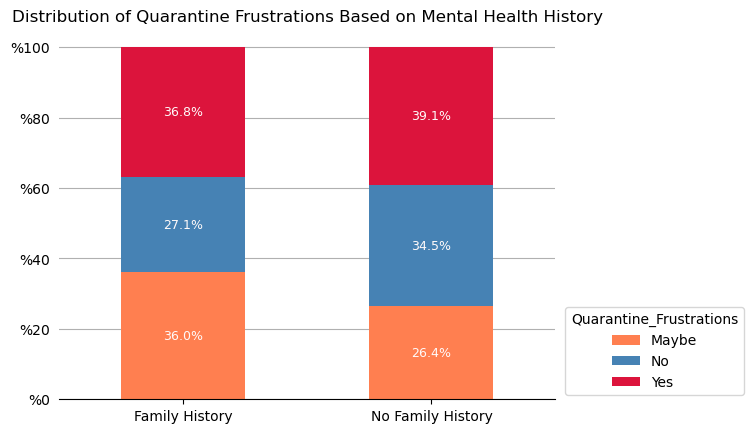

In [22]:
## Is there a significant relationship between participant's mental history and their experience of quarantine frustrations?

category_mapping = {
    "Yes": "Family History",
    "No": "No Family History"
}
df["Mental_Health_History"] = df["Mental_Health_History"].map(category_mapping)
# Create the pivot table
pivot_table = df.pivot_table(index="Mental_Health_History", columns="Quarantine_Frustrations", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Distribution of Quarantine Frustrations Based on Mental Health History")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Quarantine_Frustrations")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Mental Health History and Quarantine Frustrations

HA
: There is a significant relationship between Mental Health History and Quarantine Frustrations

Statistical Test

Chi-squared test

In [23]:
# CONCLUSION

crosstab = pd.crosstab(df["Mental_Health_History"], df["Quarantine_Frustrations"])

chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print(f"""{gre}Reject the null hypothesis{res} - {blk}Statistically significant relationship{res} -\n
{blu}The analysis indicates a statistically significant relationship between 
a participant's mental health history and their experience of quarantine frustrations.
This finding suggests that past mental health conditions may influence or contribute
to the level of frustration individuals experience during times of quarantine.{res}""")
else:
    print(f"""{blk}No statistically significant relationship.{res} {red}Fail to reject the null hypothesis{res}""")

Chi-squared value: 6.605925406557405
P-value: 0.03677405523355191
Reject the null hypothesis - Statistically significant relationship -

The analysis indicates a statistically significant relationship between 
a participant's mental health history and their experience of quarantine frustrations.
This finding suggests that past mental health conditions may influence or contribute
to the level of frustration individuals experience during times of quarantine.


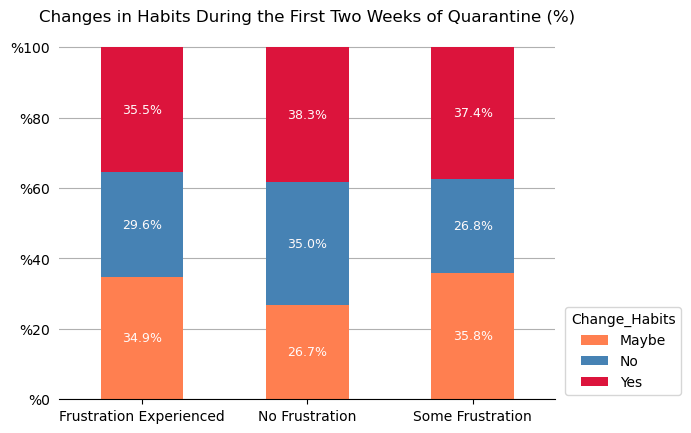

In [24]:
## Do Individuals experiencing quarantine frustration ntend to change their habits more?

frust_mapping = {
    "Yes": "Frustration Experienced",
    "No": "Some Frustration",
    "Maybe": "No Frustration"
}
df["Quarantine_Frustrations"] = df["Quarantine_Frustrations"].map(frust_mapping)
# Create the pivot table
pivot_table = df.pivot_table(index="Quarantine_Frustrations", columns="Changes_Habits", aggfunc="size")
# Calculate percentiles by Occupation
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100
colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
ax.spines[["top","right","left"]].set_visible(False)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_axisbelow(True)
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Changes in Habits During the First Two Weeks of Quarantine (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Change_Habits")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Quarantine Frustration and Changes in Habits

HA
: There is a significant relationship between Quarantine Frustration and Changes in Habits

Statistical Test
Chi-squared test

In [25]:
# CONCLUSION
crosstab = pd.crosstab(df["Quarantine_Frustrations"], df["Changes_Habits"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 7.4446051195924605
P-value: 0.11417692628859363
Fail to reject the null hypothesis - No statistically significant relationship - 


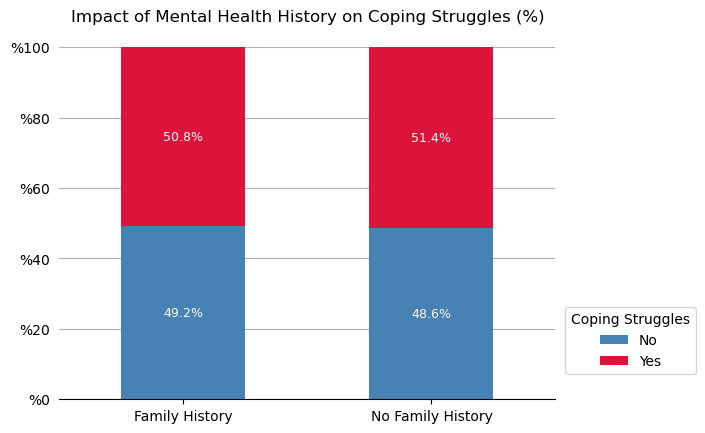

In [26]:
## Do individuals with a history of mental health issues struggle more with coping daily problems ?

# Create the pivot table
pivot_table = df.pivot_table(index="Mental_Health_History", columns="Coping_Struggles", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Impact of Mental Health History on Coping Struggles (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Coping Struggles")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Mental Health History and Coping Struggles

HA
: There is a significant relationship between Mental Health History and Coping Struggles

Statistical Test

Chi-squared test

In [27]:
# CONCLUSION

crosstab = pd.crosstab(df["Mental_Health_History"], df["Coping_Struggles"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 0.0037536192316119433
P-value: 0.9511467409527915
Fail to reject the null hypothesis - No statistically significant relationship - 


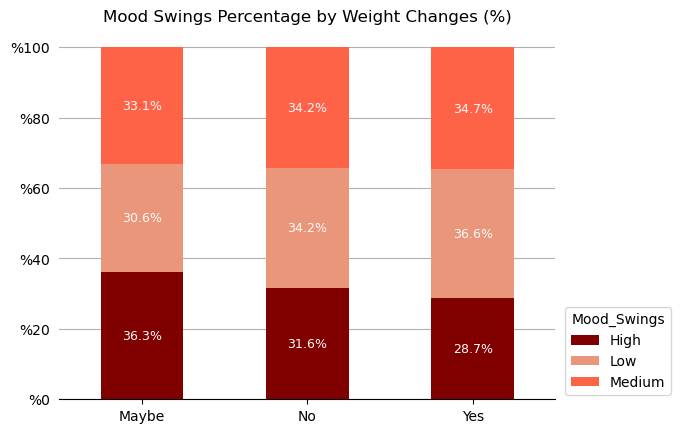

In [28]:
## Do Individuals experiencing weight change also have more frequent mood swings ?

# Create the pivot table
pivot_table = df.pivot_table(index="Weight_Change", columns="Mood_Swings", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"High":"maroon","Low":"darksalmon","Medium":"tomato"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Mood Swings Percentage by Weight Changes (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Mood_Swings")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Weight Change and Mood Swings

HA
: There is a significant relationship between Weight Change and Mood Swings

Statistical Test

Chi-squared test

In [30]:
# CONCLUSION

crosstab = pd.crosstab(df["Weight_Change"], df["Mood_Swings"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 4.065098925241996
P-value: 0.39726735364421484
Fail to reject the null hypothesis - No statistically significant relationship - 


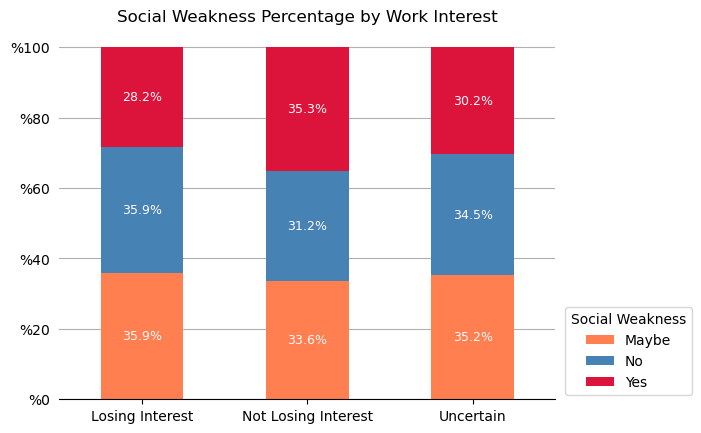

In [31]:
## Do Individuals losing interest in work also feel more mentally weak in social interactions ?

work_interest_mapping = {
    "Yes": "Losing Interest",
    "Maybe": "Uncertain",
    "No": "Not Losing Interest"
}
df["Work_Interest"] = df["Work_Interest"].map(work_interest_mapping)
# Create the pivot table
pivot_table = df.pivot_table(index="Work_Interest", columns="Social_Weakness", aggfunc="size")
# Calculate percentiles by Mental_Health_History
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","Maybe":"coral","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)

ax.spines[["top","right","left"]].set_visible(False)
ax.set_axisbelow(True)
ax.tick_params(axis="y", which="both", left=False, right=False)
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Social Weakness Percentage by Work Interest")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Social Weakness")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=9)

plt.show()

Hypothesis

H0
: There is no relationship between Work Interest and Social Weakness

HA
: There is a significant relationship between Work Interest and Social Weakness

Statistical Test

Chi-squared tes

In [32]:
# CONCLUSION

crosstab = pd.crosstab(df["Work_Interest"], df["Social_Weakness"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} -")
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 3.4962718011469796
P-value: 0.4784454517217702
Fail to reject the null hypothesis - No statistically significant relationship - 


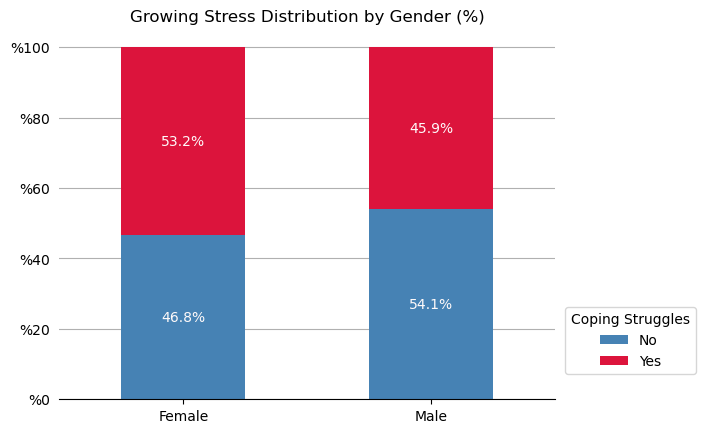

In [35]:
## Does Gender influence the choice of coping strategies for daily problems or stress?

# Create the pivot table
pivot_table = df.pivot_table(index="Gender", columns="Coping_Struggles", aggfunc="size")
# Calculate percentiles by gender
grouped_data_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

colors = {"Yes":"crimson","No":"steelblue"}
fig, ax = plt.subplots()
grouped_data_percentage.plot(kind="bar",stacked=True,color=colors,ax=ax)
# Hide frame lines
ax.spines[["top","right","left"]].set_visible(False)
# Place the axis below (allows grid lines to appear in front)
ax.set_axisbelow(True)
# Turn off left and right tick marks on the y-axis
ax.tick_params(axis="y", which="both", left=False, right=False)
# Format y-axis numbers as percentages
ax.yaxis.set_major_formatter("%{x:1.0f}")
ax.set_xlabel("")
plt.xticks(rotation=0) 
plt.grid(axis="y")
plt.title("Growing Stress Distribution by Gender (%)")
plt.legend(bbox_to_anchor=(1.02, 0.25), loc="upper left", borderaxespad=0,title="Coping Struggles")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f"{height:.1f}%", (x + width / 2., y + height / 2.), ha="center", va="center", xytext=(0, 0),
                textcoords="offset points",color="snow",fontsize=10)

plt.show()

Hypothesis

H0
: There is no relationship between Gender and Coping Struggles

HA
: There is a significant relationship between Gender and Coping Struggles

Statistical Test

Chi-squared test

In [36]:
# CONCLUSION

crosstab = pd.crosstab(df["Gender"], df["Coping_Struggles"])
alpha = 0.05
chi2, p, _, _ = chi2_contingency(crosstab)

print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

if p < alpha:
    print(f"""{gre}Reject the null hypothesis{gre} - {blk}Statistically significant relationship{res} - \n 
{blu}It indicates that gender has a notable impact on individuals' ability to cope with daily problems or stress.{res} """)
else:
    print(f"{red}Fail to reject the null hypothesis{res} - {blk}No statistically significant relationship{res} - ")

Chi-squared value: 4.124505784235549
P-value: 0.04226636445747966
Reject the null hypothesis - Statistically significant relationship - 
 
It indicates that gender has a notable impact on individuals' ability to cope with daily problems or stress. 
